In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# **Creating Dataset**

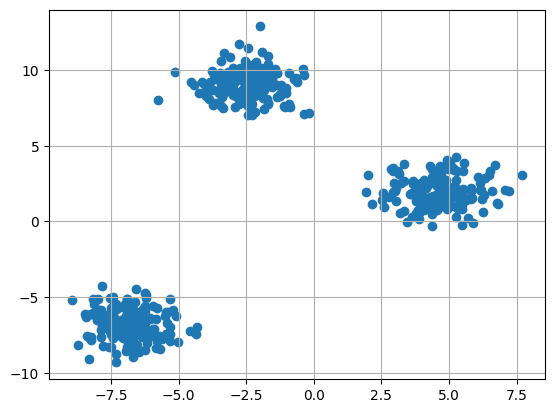

In [10]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 42)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

# **Creating Center Points**

In [11]:
k = 3

clusters = {}
np.random.seed(42)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
  #Further scales the values to be between -2 and 2. This ensures the initial cluster centers are spread over a larger range.
	points = []
	cluster = {
		'center' : center,
		'points' : []
	}

	clusters[idx] = cluster

clusters


{0: {'center': array([-0.50183952,  1.80285723]), 'points': []},
 1: {'center': array([0.92797577, 0.39463394]), 'points': []},
 2: {'center': array([-1.37592544, -1.37602192]), 'points': []}}

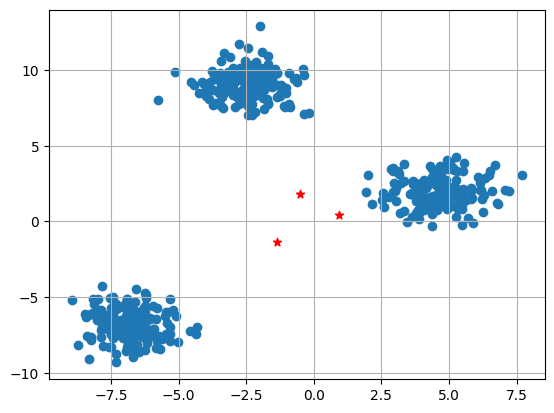

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


# **Distance calculation**

In [14]:
def distance(p1,p2):
	return np.sqrt(np.sum((p1-p2)**2))


In [15]:
#Implementing E step
def assign_clusters(X, clusters):
	for idx in range(X.shape[0]):
		dist = []

		curr_x = X[idx]

		for i in range(k):
			dis = distance(curr_x,clusters[i]['center']) # Calculate distance to each cluster center
			dist.append(dis)
		curr_cluster = np.argmin(dist)
		clusters[curr_cluster]['points'].append(curr_x) # Assign the current point to the nearest cluster
	return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
	for i in range(k):
		points = np.array(clusters[i]['points'])   # Convert the list of points to a numpy array for easier computation
		if points.shape[0] > 0: # Check if there are any points in the cluster
			new_center = points.mean(axis =0) Calculate the mean of the points along each feature axis
			clusters[i]['center'] = new_center

			clusters[i]['points'] = []
	return clusters


**Predict the cluster for the datapoints**

In [16]:
def pred_cluster(X, clusters):
	pred = []
	for i in range(X.shape[0]):
		dist = []
		for j in range(k):
			dist.append(distance(X[i],clusters[j]['center'])) # Calculate and store the distance to each cluster center
		pred.append(np.argmin(dist)) # Find the index of the minimum distance and append it to the predictions
	return pred


In [17]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

# **Plotting the calculated Central Point**

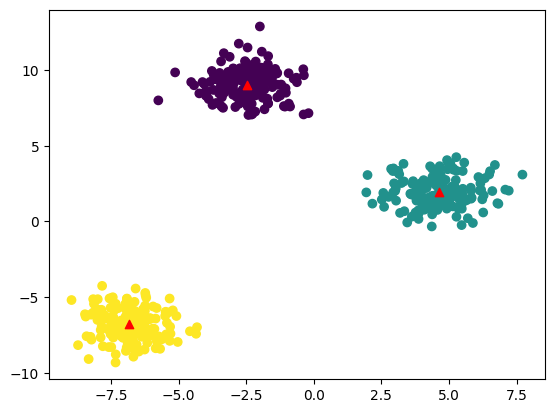

In [18]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
